# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine Learning is an appropriate solution to deploy the business problem and business goal here because it contains a big amount of data with a lot of variables.

### 2. Formulate the business problem, success metrics, and desired ML output.

Formulate the business problem: improve customer experience for delay flights
Sucess metrics: Exactly predict if there is any delay before 24 hours of departure.
Desired ML output: Delayed or not delayed

### 3. Identify the type of ML problem you’re dealing with.

This data contains historical data collected for 5 years from 2014 to 2018 of flights within America, it means there is enough information to define the label. Therefore, the type of ML problem is supervised learning approach.
Moreover, the desired output of the transaction is delayed or not delayed, which is a binary classification problem.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [117]:
import os
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
import glob
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# # download the files
# <note: make them all relative, absolute path is not accepted>
zip_path = 'Flight_Data'
base_path = 'Final Project'
csv_base_path = 'Extracted_data'


In [3]:
# How many zip files do we have? write a code to answer it.
# Specify the directory where the ZIP files are located
# Use the glob module to search for ZIP files
zip_files = glob.glob(f"{zip_path}/*.zip")

# Get the count of ZIP files
num_zip_files = len(zip_files)

print(f"Number of ZIP files: {num_zip_files}")

Number of ZIP files: 60


In [4]:
zip_files

['Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip',
 'Flight_Data\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip',
 'Flight_Data\\On_Time_Reporting_Carrier

#### Extract CSV files from ZIP files

In [5]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting Flight_Data\On_Time_Reporting_Carrier_On_Time_

In [6]:
# How many csv files have we extracted? write a code to answer it.
# Use the glob module to search for CSV files
csv_files = glob.glob(f"{csv_base_path}/*.csv")
# Get the count of CSV files
num_csv_files = len(csv_files)

print(f"Number of CSV files: {num_csv_files}")

Number of CSV files: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [7]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [8]:
df_temp = pd.read_csv(f"{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

**Question**: Print the row and column length in the dataset, and print the column names.

In [9]:
df_shape = df_temp.shape
# Get the number of rows and columns
num_rows, num_columns = df_shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [10]:
df_temp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [11]:
print(f'The column names are :')
print('#########')
for col in df_temp:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [12]:
for col in df_temp:
    if "Del" in col:
        print(col)

DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [13]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", num_rows , " and ", num_columns)
print("The years in this dataset are: ", df_temp.Year.unique())
print("The months covered in this dataset are: ", df_temp.Month.unique())
print("The date range for data is :" , min(df_temp.DayofMonth), " to ", max(df_temp.DayofMonth))
print("The airlines covered in this dataset are: ", list(df_temp.Reporting_Airline.unique()))
print("The Origin airports covered are: ", list(df_temp.Origin.unique()))
print("The Destination airports covered are: ", list(df_temp.Dest.unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 1  to  30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ', 'MLI', 'BHM', 

In [14]:
print("The years in this dataset are: ", df_temp.Year.unique())

The years in this dataset are:  [2018]


**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [15]:
counts = pd.DataFrame({'Origin':df_temp.Origin.value_counts(), 'Destination':df_temp.Dest.value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [16]:
counts.sort_values(by='Origin',ascending=False).head(15)

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes we can. We can build a model to predict if the flight is delay or not. The model will be trained on 80% historical data of flight first, then test on other 20% of data.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [18]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty DataFrame
    combined_data = pd.DataFrame()
    
    for file in csv_files:
        data = pd.read_csv(file)
        
        # Filter columns if specified
        if filter_cols:
            data = data[filter_cols]
        
        # Subset rows based on column values if specified
        if subset_cols and subset_vals:
            for col, vals in zip(subset_cols, subset_vals):
                data = data[data[col].isin(vals)]
        
        # Concatenate the data to the combined DataFrame
        combined_data = pd.concat([combined_data, data], ignore_index=True)
    
    # Save the combined data to a new CSV file
    combined_data.to_csv(file_name, index=False)
    
    return combined_data

In [19]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [20]:
start = time.time()

# Specify the output CSV file name
output_file = 'combined_data.csv'

# < write code to call the combined_csv function>
combined_data = combine_csv(csv_files, cols, subset_cols, subset_vals, output_file)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 9.45 minutes


#### Load dataset

Load the combined dataset.

In [121]:
# Code to read the combined csv file.
data = pd.read_csv(output_file)
combined_data = data

Print the first 5 records.

In [122]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [123]:
# to answer above questions, complete the following code
num_rows, num_columns = data.shape
print("The #rows and #columns are ", num_rows , " and ", num_columns)
print("The years in this dataset are: ", data.Year.unique())
print("The months covered in this dataset are: ", data.Month.unique())
print("The date range for data is :" , min(data.DayofMonth), " to ", max(data.DayofMonth))
print("The airlines covered in this dataset are: ", list(data.Reporting_Airline.unique()))
print("The Origin airports covered are: ", list(data.Origin.unique()))
print("The Destination airports covered are: ", list(data.Dest.unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014 2015 2016 2017 2018]
The months covered in this dataset are:  [ 1 10 11 12  2  3  4  5  6  7  8  9]
The date range for data is : 1  to  31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [124]:
data.rename(columns={'ArrDel15':'is_delay'}, inplace=True)

In [125]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [126]:
data.isnull().sum(axis=0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [127]:
### Remove null rows
data = data[~data["ArrDelay"].isnull()]

In [128]:
data.isnull().sum(axis=0)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64

In [129]:
pd.isna(data).sum(axis=0)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64

Get the hour of the day in 24-hour time format from CRSDepTime.

In [130]:
data['CRSDepTime'] = data['CRSDepTime'].astype(str) 

# Delete the last 2 letters
data['DepHourofDay'] = pd.to_numeric(data['CRSDepTime'].str.slice(0, -2))

In [131]:
data

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,2018,3,9,11,2,2018-09-11,WN,DEN,CO,PHX,...,1105,0.0,0.0,602.0,3,-18.0,0.0,0.0,87.0,11.0
1658126,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,...,825,0.0,0.0,967.0,4,-8.0,0.0,0.0,133.0,8.0
1658127,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,...,1240,0.0,0.0,967.0,4,17.0,17.0,1.0,141.0,12.0
1658128,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,...,2210,0.0,0.0,967.0,4,2.0,2.0,0.0,138.0,22.0


In [132]:
### Remove null rows
data = data[~data['DepHourofDay'].isnull()]

In [133]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime            object
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay         float64
dtype: object

In [134]:
data = data.drop('CRSDepTime', axis=1)
data

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,2018,3,9,11,2,2018-09-11,WN,DEN,CO,PHX,AZ,0.0,0.0,602.0,3,-18.0,0.0,0.0,87.0,11.0
1658126,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,0.0,0.0,967.0,4,-8.0,0.0,0.0,133.0,8.0
1658127,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,0.0,0.0,967.0,4,17.0,17.0,1.0,141.0,12.0
1658128,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,0.0,0.0,967.0,4,2.0,2.0,0.0,138.0,22.0


In [135]:
pd.isna(data).sum(axis=0)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
DepHourofDay         0
dtype: int64

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

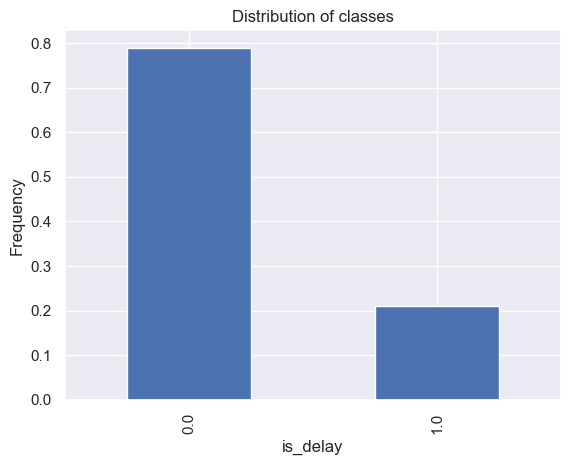

In [36]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The number of delays accounted for 20% of total flights, this is a big number, which will reduce the satisfaction of customers. However,the low ratio of class 1 will lead to biased model performance due to imbalanced data.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

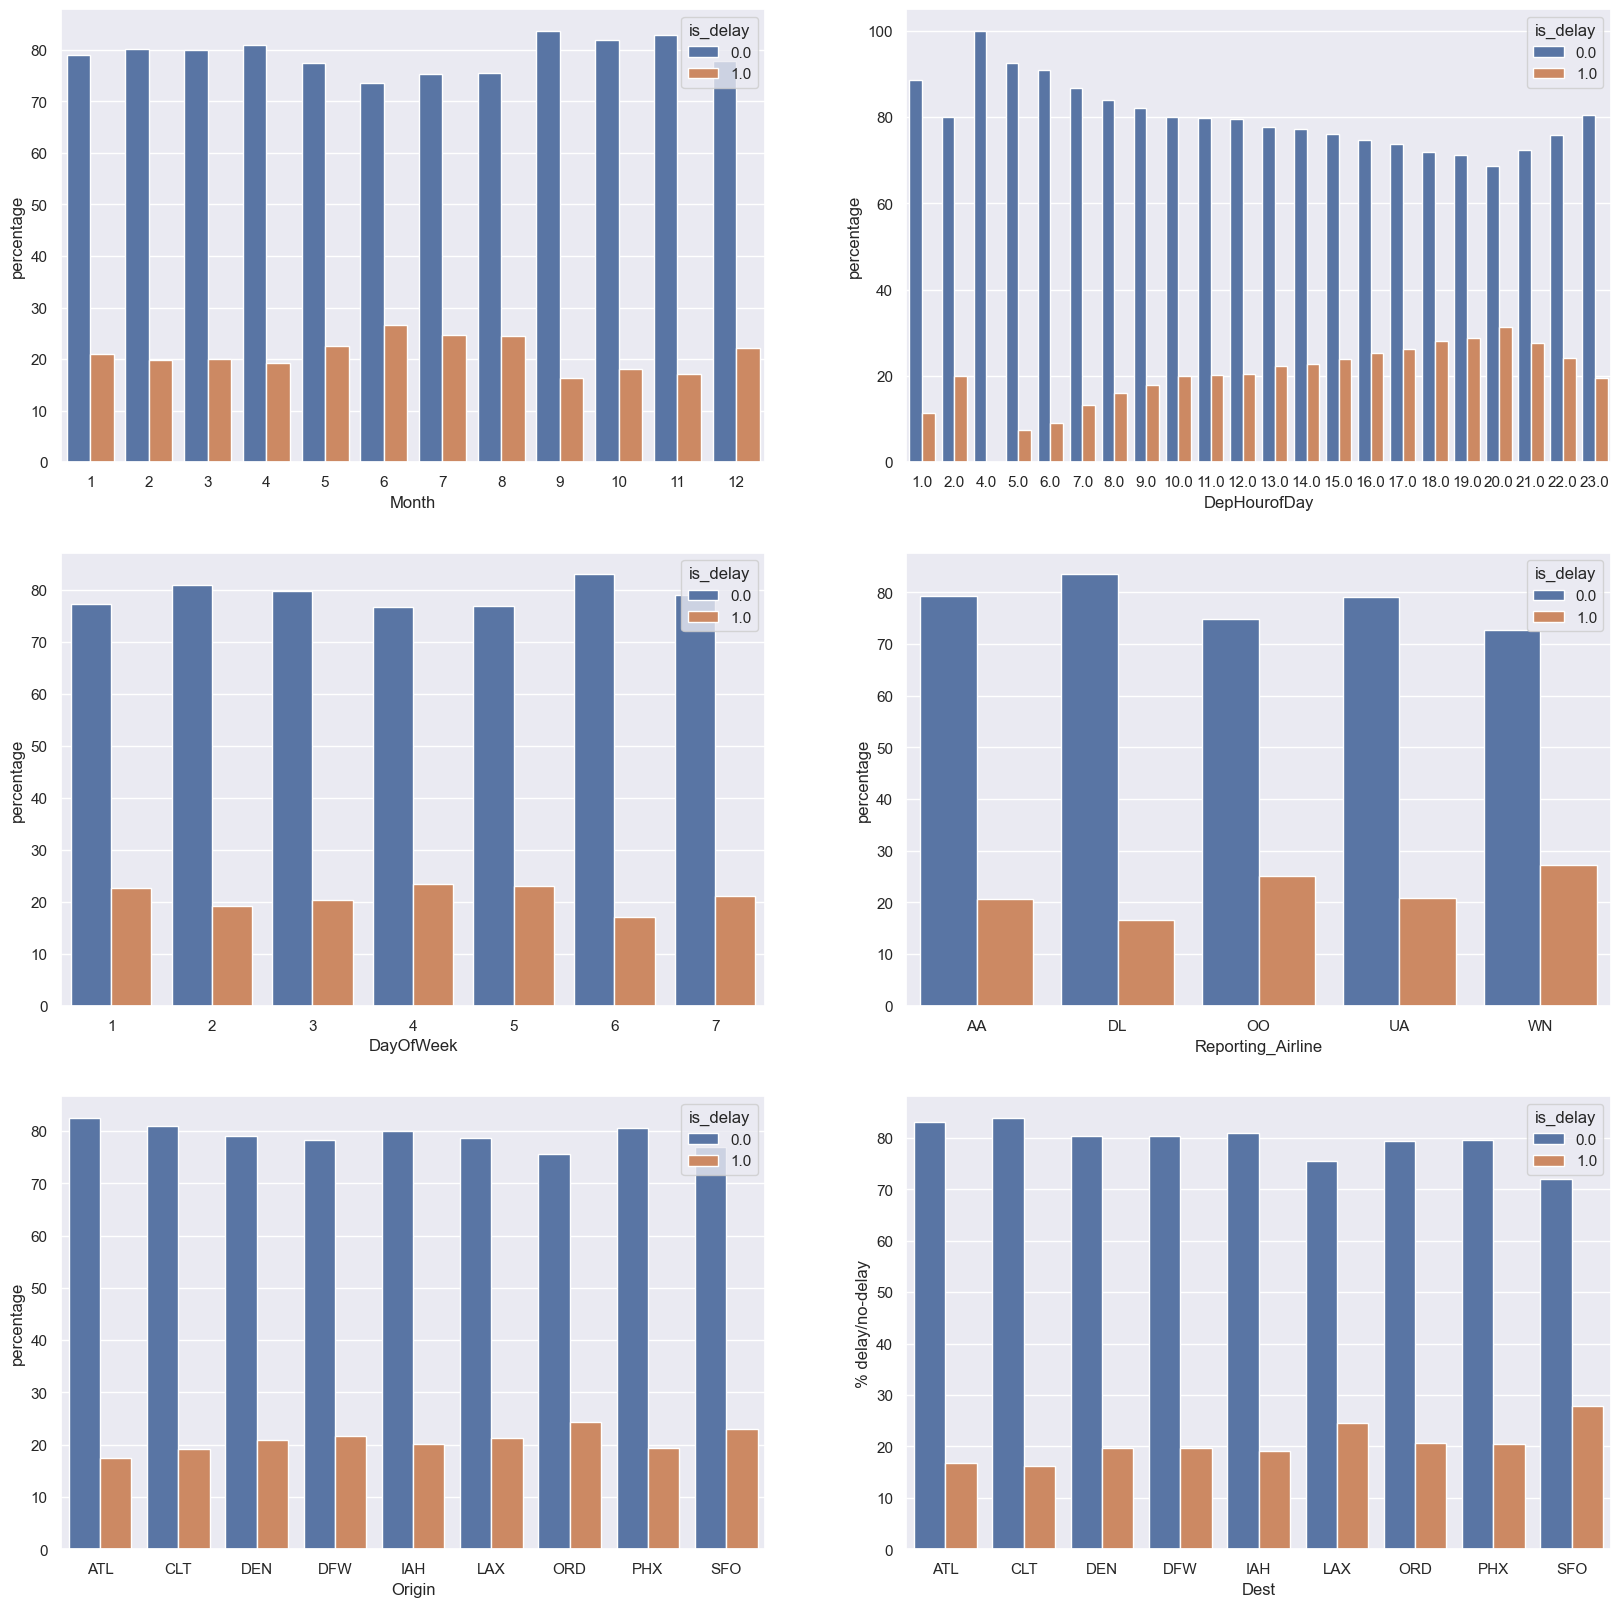

In [37]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

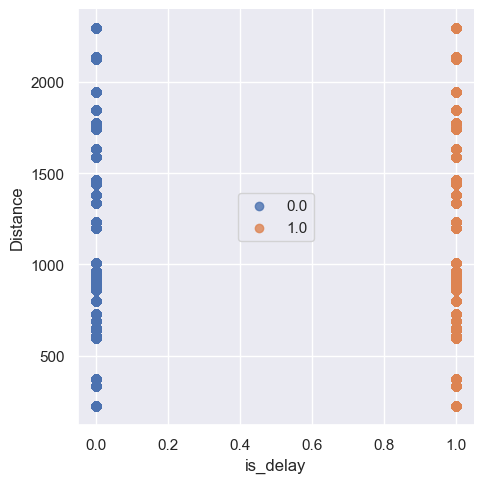

In [38]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

Which months have the most delays?
June is month has most delay

What time of the day has the most delays?
20 is time of day has most delay

What day of the week has the most delays?
Day 4 (Wednesday) is day of the week has most delay

Which airline has the most delays?
WN is the airline has has most delay

Which origin and destination airports have the most delays?
ORD is the origin airport has most delay
SFO is the destination airport has most delay

Is flight distance a factor in the delays?
There is no correlation between distance and delays

### Features

Look at all the columns and what their specific types are.

In [136]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'Cancelled', 'Diverted', 'Distance', 'DistanceGroup', 'ArrDelay',
       'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [137]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay         float64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [138]:
data_orig = data.copy()
data_modified = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]

categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest']

for c in categorical_columns:
    data_modified[c] = data_modified[c].astype('category')# Enter your code here

In [139]:
data_modified.dtypes

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay          float64
dtype: object

In [140]:
data_dummies = pd.get_dummies(data_modified[categorical_columns], drop_first=True, dtype=float)

In [141]:
data = pd.concat([data_modified, data_dummies], axis = 1)

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [142]:
data.drop(categorical_columns,axis=1, inplace=True)

In [143]:
data

,is_delay,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,...,Origin_PHX,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,0.0,689.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,731.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1199.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1587.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1587.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,0.0,602.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1658126,0.0,967.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1658127,1.0,967.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1658128,0.0,967.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Check the length of the dataset and the new columnms.

In [144]:
data.shape

(1619357, 73)

In [145]:
data.head()

,is_delay,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,...,Origin_PHX,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,0.0,689.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,731.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1199.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1587.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1587.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
data.columns


Index(['is_delay', 'Distance', 'DepHourofDay', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [147]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [148]:
data

,target,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,...,Origin_PHX,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,0.0,689.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,731.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1199.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1587.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1587.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,0.0,602.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1658126,0.0,967.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1658127,1.0,967.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1658128,0.0,967.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
# Write the DataFrame to a CSV file

data.to_csv('combined_csv_v1.csv', index=False)  # Use index=False to exclude the index column


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [150]:
# Code to split data into train, validate and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=data.drop('target', axis=1)
y=data['target']

In [151]:
X

,Distance,DepHourofDay,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,Origin_PHX,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
0,689.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,731.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1199.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1587.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1587.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,602.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1658126,967.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1658127,967.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1658128,967.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [152]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1658125    0.0
1658126    0.0
1658127    1.0
1658128    0.0
1658129    0.0
Name: target, Length: 1619357, dtype: float64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline classification model

In [154]:
# Create a baseline logistic regression model
classifier1 = LogisticRegression()

# Train the model on the training data
classifier1.fit(X_train, y_train)

LogisticRegression()

In [155]:
# Make predictions on the training set
y_train_pred = classifier1.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")

Train Accuracy: 0.79


In [156]:
# Make predictions on the test data
y_pred = classifier1.predict(X_test)

# Predict probabilities on the test set
y_scores = classifier1.predict_proba(X_test)[:, 1]

# Evaluate the model using accuracy as the metric
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.79


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [157]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    cm = confusion_matrix(test_labels, target_predicted)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    


In [158]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

def plot_roc(test_labels, target_predicted):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
 
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])


To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

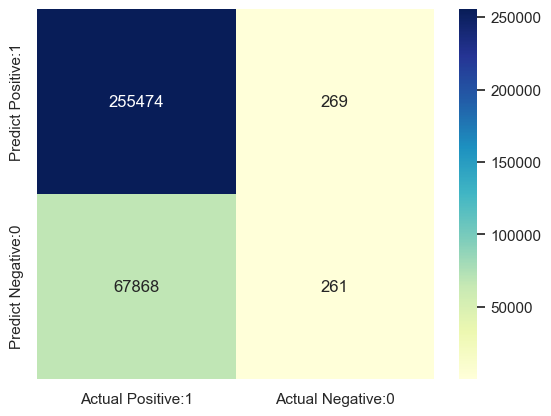

In [159]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:


**Question**: What can you summarize from the confusion matrix?

The right predicted values are mainly class 1 with 255,474 flights while class 0 was predicted wrongly 67,868 flights as class 1.
Therefore, the results are almost flights will be delayed

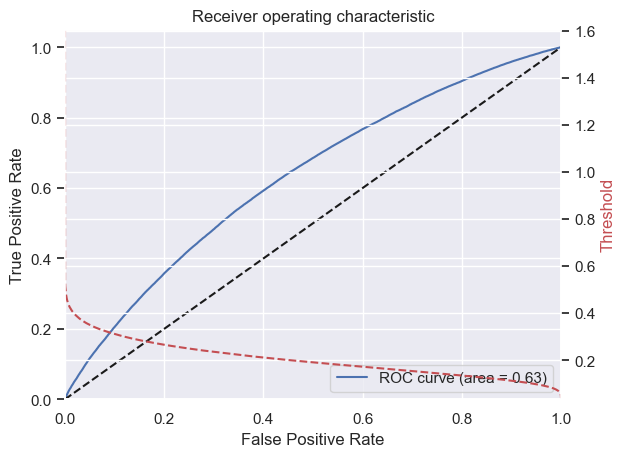

In [160]:
# Plot ROC curve
plot_roc(y_test, y_scores) 

In [161]:
classification_rep1 = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep1)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    255743
         1.0       0.49      0.00      0.01     68129

    accuracy                           0.79    323872
   macro avg       0.64      0.50      0.44    323872
weighted avg       0.73      0.79      0.70    323872



### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

### Answers:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?

The accuracy of train and test sets are the same 79%. This can be influenced by the imblanced data.

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?

There are obvious differences between the outcomes of metrics of 2 classes like accuracy, precision, and recall. The accuracy, precision, and recall of class 0 are very high while the class 1 are low. Especially, the recall of class 0 is 100% while class 1 is 0.

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

The metrics show that the model is not good to apply in real life. To improve the result, I am going to use Random Oversampling to balance the data.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


https://github.com/KayHuynh14/DataScienceFinalProj

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [177]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(pd.to_datetime(holidays))

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [178]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [179]:
weather = pd.read_csv('daily-summaries.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [180]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [181]:
weather.isna().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

In [182]:
unique_count_SNOW = weather['SNOW'].value_counts()
unique_count_SNOW

SNOW
0.0      10647
3.0         36
5.0         30
8.0         17
10.0        17
25.0        17
15.0        14
18.0        14
13.0        11
20.0        11
43.0        10
58.0         9
56.0         8
23.0         6
51.0         6
36.0         6
33.0         6
38.0         5
28.0         5
46.0         5
97.0         4
30.0         4
76.0         4
41.0         4
86.0         4
71.0         3
94.0         3
64.0         3
69.0         3
61.0         3
66.0         3
81.0         2
48.0         2
79.0         2
99.0         2
130.0        2
74.0         2
145.0        2
53.0         2
107.0        2
127.0        1
137.0        1
411.0        1
178.0        1
163.0        1
157.0        1
84.0         1
142.0        1
147.0        1
221.0        1
89.0         1
152.0        1
91.0         1
104.0        1
300.0        1
333.0        1
119.0        1
175.0        1
196.0        1
117.0        1
Name: count, dtype: int64

In [183]:
unique_count_SNWD = weather['SNWD'].value_counts()
unique_count_SNWD

SNWD
0.0      10547
30.0       127
50.0        84
130.0       40
80.0        38
100.0       30
150.0       30
230.0       12
180.0       10
250.0        9
200.0        6
280.0        5
300.0        5
360.0        3
25.0         3
330.0        2
460.0        1
430.0        1
410.0        1
380.0        1
51.0         1
Name: count, dtype: int64

In [184]:
weather.SNOW.fillna(0, inplace=True)# Enter your code here
weather.SNWD.fillna(0, inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [185]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = weather[weather['TAVG'].isna()].index 
TMAX_idx = weather[weather['TMAX'].isna()].index 
TMIN_idx = weather[weather['TMIN'].isna()].index 
TAVG_idx

Index([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,  3965,
        3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,  3974,  3975,
        3976,  3977,  3978,  3979,  3980,  3981,  3982,  3983,  3984,  3985,
        4017,  4018,  4019,  4020,  4021,  4022,  4023,  4024,  4025,  4026,
        4027,  4028,  4029,  4030,  4031,  4032,  4033,  4034,  4035,  4036,
        4037,  4038,  4039,  4040,  4041,  4042,  4043,  4044,  4045,  4046,
        4047, 13420],
      dtype='int64')

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [186]:
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [187]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [188]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [189]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [190]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [191]:
sum(data.isna().any())

0

In [192]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'Cancelled', 'Diverted', 'Distance', 'DistanceGroup', 'ArrDelay',
       'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay', 'AWND_O',
       'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [193]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek','DepHourofDay',       
       'Reporting_Airline', 'Origin', 'Dest','Distance','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [194]:
categorical_columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Reporting_Airline',
 'Origin',
 'Dest',
 'is_holiday']

In [195]:
data.dtypes

is_delay              float64
Year                 category
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
DepHourofDay          float64
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
is_holiday           category
AWND_O                  int64
AWND_O                  int64
PRCP_O                  int64
PRCP_O                  int64
TAVG_O                float64
TAVG_O                float64
AWND_D                  int64
AWND_D                  int64
PRCP_D                  int64
PRCP_D                  int64
TAVG_D                float64
TAVG_D                float64
SNOW_O                float64
SNOW_O                float64
SNOW_D                float64
SNOW_D                float64
dtype: object

In [196]:
data.head()

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,DepHourofDay,Reporting_Airline,Origin,Dest,...,AWND_D,AWND_D,PRCP_D,PRCP_D,TAVG_D,TAVG_D,SNOW_O,SNOW_O,SNOW_D,SNOW_D
0,0.0,2014,1,1,26,7,21.0,DL,ATL,IAH,...,30,30,0,0,130.0,130.0,0.0,0.0,0.0,0.0
1,0.0,2014,1,1,26,7,9.0,DL,DFW,ATL,...,33,33,0,0,54.0,54.0,0.0,0.0,0.0,0.0
2,0.0,2014,1,1,26,7,18.0,DL,ATL,DEN,...,77,77,0,0,68.0,68.0,0.0,0.0,0.0,0.0
3,0.0,2014,1,1,26,7,16.0,DL,ATL,PHX,...,20,20,0,0,165.0,165.0,0.0,0.0,0.0,0.0
4,0.0,2014,1,1,26,7,7.0,DL,PHX,ATL,...,33,33,0,0,54.0,54.0,0.0,0.0,0.0,0.0


In [197]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True, dtype=float)
# Apply pd.get_dummies to a boolean column
data_dummies['is_holiday1'] = pd.get_dummies(data['is_holiday'], prefix='is_holiday', dtype=float)


In [198]:
data_dummies

,Year_2015,Year_2016,Year_2017,Year_2018,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619352,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1619353,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1619354,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1619355,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [199]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619357 entries, 0 to 1619356
Data columns (total 75 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Year_2015             1619357 non-null  float64
 1   Year_2016             1619357 non-null  float64
 2   Year_2017             1619357 non-null  float64
 3   Year_2018             1619357 non-null  float64
 4   Quarter_2             1619357 non-null  float64
 5   Quarter_3             1619357 non-null  float64
 6   Quarter_4             1619357 non-null  float64
 7   Month_2               1619357 non-null  float64
 8   Month_3               1619357 non-null  float64
 9   Month_4               1619357 non-null  float64
 10  Month_5               1619357 non-null  float64
 11  Month_6               1619357 non-null  float64
 12  Month_7               1619357 non-null  float64
 13  Month_8               1619357 non-null  float64
 14  Month_9               1619357 non-

In [200]:
data = pd.concat([data, data_dummies], axis = 1)

In [201]:
data

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,DepHourofDay,Reporting_Airline,Origin,Dest,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday1
0,0.0,2014,1,1,26,7,21.0,DL,ATL,IAH,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,2014,1,1,26,7,9.0,DL,DFW,ATL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2014,1,1,26,7,18.0,DL,ATL,DEN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,2014,1,1,26,7,16.0,DL,ATL,PHX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,2014,1,1,26,7,7.0,DL,PHX,ATL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619352,0.0,2018,3,9,11,2,11.0,WN,DEN,PHX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1619353,0.0,2018,3,9,11,2,8.0,WN,DEN,SFO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1619354,1.0,2018,3,9,11,2,12.0,WN,DEN,SFO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1619355,0.0,2018,3,9,11,2,22.0,WN,DEN,SFO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [202]:
categorical_columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Reporting_Airline',
 'Origin',
 'Dest',
 'is_holiday']

In [203]:
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [204]:
data.columns

Index(['is_delay', 'DepHourofDay', 'Distance', 'AWND_O', 'AWND_O', 'PRCP_O',
       'PRCP_O', 'TAVG_O', 'TAVG_O', 'AWND_D', 'AWND_D', 'PRCP_D', 'PRCP_D',
       'TAVG_D', 'TAVG_D', 'SNOW_O', 'SNOW_O', 'SNOW_D', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'D

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [205]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here


In [208]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

data.to_csv('combined_csv_v2.csv', index=False)  # Use index=False to exclude the index column
#data_orig.to_csv('combined_csv_Tableau.csv', index=False)

Create the training and testing sets again.

In [209]:
X=data.drop('target', axis=1)
y=data['target']

In [212]:
# Resample data with Random Over ampler

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [213]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [214]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression()

# Train the model on the training data
classifier2.fit(X_train, y_train)


LogisticRegression()

In [215]:
# Make predictions on the training set
y_train_pred = classifier2.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")

Train Accuracy: 0.58


In [216]:
# Make predictions on the test data
y_pred = classifier2.predict(X_test)

# Predict probabilities on the test set
y_scores = classifier2.predict_proba(X_test)[:, 1]

# Evaluate the model using accuracy as the metric
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.58


In [217]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    cm = confusion_matrix(test_labels, target_predicted)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [218]:
# ROC curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

def plot_roc(test_labels, target_predicted):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
 
    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])


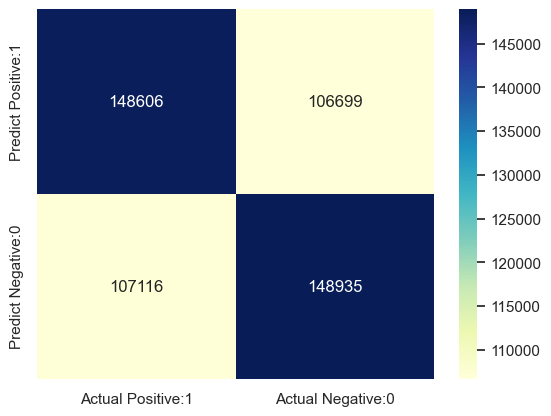

In [219]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

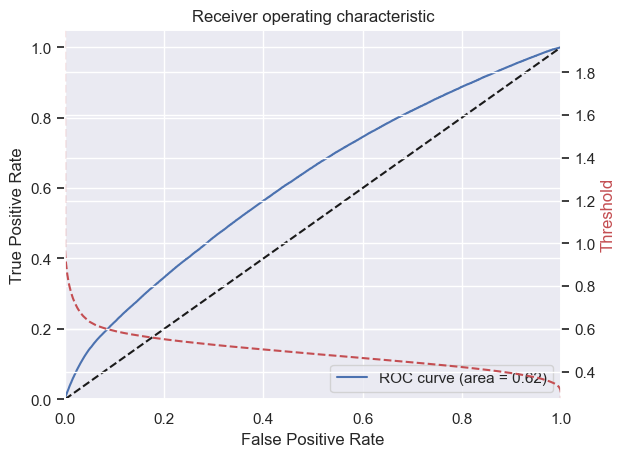

In [220]:
# Plot ROC curve
plot_roc(y_test, y_scores) 

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

In [221]:
# Classification report
classification_rep2 = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep2)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.58      0.58    255305
         1.0       0.58      0.58      0.58    256051

    accuracy                           0.58    511356
   macro avg       0.58      0.58      0.58    511356
weighted avg       0.58      0.58      0.58    511356



### Question: did you notice a difference by adding the extra data on the results?

There are big difference between result of classification report in model 1 and 2. In model 2, the metrics of class 0 and 1 are balance. However, the accuracy has deduced to 58%.



# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

https://public.tableau.com/views/FlightDelayDashboard_16989592177260/DashboardofDelayflights?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?

The model does not meet the bussiness goal. The balance method is not effective. If I have more time, I can try different model like Random Forest, which can use for imbalanced data.

2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?

There is no improve. When I do not apply balancing data, the accuracy keeps the same, there are improvement between metrics in classification report. On the other hand, when apply balancing data. The results are even worse. 

3. What were some of the biggest challenges you encountered throughout this project?

In my oppinion, the biggest challenge of this project is training model with Amazone SageMaker, how to create Bucket.
Next is encoding the data. I have to spend time understand each feature and how to process it correctly.

4. What were the three most important things you learned about machine learning while completing this project?

Three most important things you learned about machine learning while completing this project are:
- We have to understand what data we have (shape, info, classes, distribution of classes, features) in order to processing data correctly.
- Only understand the data, we can choose the right model.
- How to use Amazone SageMaker to train and test model.
